# Table of Contents
 <p><div class="lev1"><a href="#Task-1.-Compiling-Ebola-Data"><span class="toc-item-num">Task 1.&nbsp;&nbsp;</span>Compiling Ebola Data</a></div>
 <div class="lev1"><a href="#Task-2.-RNA-Sequences"><span class="toc-item-num">Task 2.&nbsp;&nbsp;</span>RNA Sequences</a></div>
 <div class="lev1"><a href="#Task-3.-Class-War-in-Titanic"><span class="toc-item-num">Task 3.&nbsp;&nbsp;</span>Class War in Titanic</a></div></p>

In [6]:
DATA_FOLDER = '../../ADA2017-Tutorials-master/02 - Intro to Pandas/Data' # Use the data folder provided in Tutorial 02 - Intro to Pandas.

## Task 1. Compiling Ebola Data

The `DATA_FOLDER/ebola` folder contains summarized reports of Ebola cases from three countries (Guinea, Liberia and Sierra Leone) during the recent outbreak of the disease in West Africa. For each country, there are daily reports that contain various information about the outbreak in several cities in each country.

Use pandas to import these data files into a single `Dataframe`.
Using this `DataFrame`, calculate for *each country*, the *daily average per month* of *new cases* and *deaths*.
Make sure you handle all the different expressions for *new cases* and *deaths* that are used in the reports.

In [29]:
from os import listdir
from os.path import isfile, join
import pandas as pd
import datetime
from dateutil.parser import parse

**Read all files:**

Once in the correct folder with 'mypath', we read all the files with 2 *for* loops.

The first loop gives us a list, *onlyfiles*, of all the files' name within the folder.

The second loop reads the content all the files in *onlyfiles* and makes one list out of it: *all_files*.

**Sierra Leone:**

In [30]:
mypath=DATA_FOLDER + '/ebola/sl_data'

onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]
all_files = [pd.read_csv(mypath + '/' + file) for file in onlyfiles]

We concatenate all files in one single dataframe per folder/country.

In [31]:
data_sl = pd.concat(f for f in all_files)

data_sl.head()

,34 Military Hospital,Bo,Bo EMC,Bombali,Bonthe,Hastings-F/Town,Kailahun,Kambia,Kenema,Kenema (IFRC),...,Port Loko,Pujehun,Tonkolili,Unnamed: 18,Western area,Western area combined,Western area rural,Western area urban,date,variable
0,NaN,654142,NaN,494139,168729,NaN,465048,341690,653013,NaN,...,557978,335574,434937,NaN,NaN,NaN,263619,1040888,2014-08-12,population
1,NaN,0,NaN,0,0,NaN,0,0,3,NaN,...,1,0,0,NaN,NaN,NaN,0,0,2014-08-12,new_noncase
2,NaN,1,NaN,0,0,NaN,0,0,9,NaN,...,0,0,0,NaN,NaN,NaN,0,0,2014-08-12,new_suspected
3,NaN,1,NaN,0,0,NaN,0,0,0,NaN,...,0,0,0,NaN,NaN,NaN,0,0,2014-08-12,new_probable
4,NaN,0,NaN,0,0,NaN,0,0,9,NaN,...,2,0,0,NaN,NaN,NaN,0,0,2014-08-12,new_confirmed


This dataframe is cleaned: 
- adding a column containing the origin of the data
- changing names of useful columns 
- getting ride of the unwanted columns

In [32]:
data_sl['Country'] = 'Sierra_Leone'
data_sl.rename(columns={'date': 'Date', 'variable': 'Description'}, inplace=True)
data_sl = data_sl[['Country', 'Date','Description','National']]

data_sl.head()

,Country,Date,Description,National
0,Sierra_Leone,2014-08-12,population,6348350
1,Sierra_Leone,2014-08-12,new_noncase,4
2,Sierra_Leone,2014-08-12,new_suspected,10
3,Sierra_Leone,2014-08-12,new_probable,1
4,Sierra_Leone,2014-08-12,new_confirmed,11


For simplicity, we repeat the process 2 more times; one for each folder/country.

**Guinea:**

In [33]:
mypath=DATA_FOLDER + '/ebola/guinea_data'

onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]
all_files = [pd.read_csv(mypath + '/' + file) for file in onlyfiles]

In [34]:
data_g = pd.concat(f for f in all_files)

Once again, the dataframe is cleaned but the columns have different initial names, making it easier to repeat the process 3 times instead of creating one more complex function.

In [35]:
data_g['Country'] = 'Guinea'
data_g.rename(columns={'Totals':'National'}, inplace=True)
data_g = data_g[['Country', 'Date','Description','National']]

**Liberia:**

In [36]:
mypath=DATA_FOLDER + '/ebola/liberia_data'

onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]
all_files = [pd.read_csv(mypath + '/' + file) for file in onlyfiles]

In [37]:
data_l = pd.concat(f for f in all_files)

In [38]:
data_l['Country'] = 'Liberia'
data_l.rename(columns={'Variable': 'Description'}, inplace=True)
data_l = data_l[['Country', 'Date','Description','National']]

We concatenate the 3 dataframes (*data_sl*, *data_g* and *data_l*) into one single dataframe. 

In [39]:
data = data_sl.append([data_g, data_l])
data.tail()

,Country,Date,Description,National
27,Liberia,12/9/2014,Total probable cases,NaN
28,Liberia,12/9/2014,Total confirmed cases,NaN
29,Liberia,12/9/2014,Total Number of Confirmed Cases \n of Sierra L...,NaN
30,Liberia,12/9/2014,Total Number of Confirmed Cases \n of Guinean ...,NaN
31,Liberia,12/9/2014,"Cumulative confirmed, probable and suspected c...",7797


We reset the index to have one unique index on the whole data.

In [40]:
data=data.reset_index()
data=data.drop('index',axis=1)
data.index.is_unique

True

For the following computations, we get ride of the *NaN* in the desired column.

In [41]:
data['National']=data['National'].fillna(0)

Now, we want to calculate the *daily average per month* of *new cases* and *deaths*.

First, we change the *Date* format and create a column *Month* containing only the month and another one containing only the year.

In [42]:
data['Date'] = data['Date'].apply(lambda x: parse(x))
data['Month'] = data['Date'].apply(lambda x: x.month)
data['Year'] = data['Date'].apply(lambda x: x.year)

This is where we select the wanted *Description* for each command.

Here, we decided that *Total new cases registered so far*, *New case/s (confirmed)* and *new_confirmed* define *new cases*. There is one label per country.

There are 4 labels to define the *Deaths* as it changes through times for *Guinea*.

In [25]:
data_c=data[data.Description.isin(['Total new cases registered so far','New case/s (confirmed)','new_confirmed'])]
data_d=data[data.Description.isin(['New deaths registered today','New deaths registered','Newly reported deaths','etc_new_deaths'])]

Drop the column *Description* for simplicity reason later on.

In [26]:
data_c=data_c[[ 'Country','Year','Month','National']]
data_d=data_d[[ 'Country','Year','Month','National']]
data_d.columns=[ 'Country','Year','Month','Deaths']

We simply change the format of the data.

In [27]:
data_c['National']=pd.to_numeric(data_c['National'])
data_d['Deaths']=pd.to_numeric(data_d['Deaths'])

Using *groupby* and *agg*, we are able to classify the data through the *Country*, then the *Year* and finally the *Month*.

In [43]:
c = data_c.groupby(['Country','Year','Month'], as_index=False,sort=False)
agg_c={'National':'mean'}
final=c.agg(agg_c)

d = data_d.groupby(['Country','Year','Month'], as_index=False,sort=False)
agg_d={'Deaths':'mean'}
final_d=d.agg(agg_d)

Finally, we join the 2 dataframes, round the values and rename the columns.

In [44]:
final['Deaths']=final_d['Deaths']
final.National=round(final.National,2)
final.Deaths=round(final.Deaths,2)
final.columns=['Country','Year','Month','New Cases','New Deaths']
final

,Country,Year,Month,New Cases,New Deaths
0,Sierra_Leone,2014,8,18.55,0.00
1,Sierra_Leone,2014,9,34.41,0.28
2,Sierra_Leone,2014,10,56.71,3.54
3,Sierra_Leone,2014,11,59.90,0.57
4,Sierra_Leone,2014,12,32.60,2.20
5,Guinea,2014,8,25.80,3.40
6,Guinea,2014,9,19.62,3.56
7,Guinea,2014,10,34.00,15.00
8,Liberia,2014,6,2.14,2.00
9,Liberia,2014,7,1.82,4.27


In [42]:
#data_l.iloc[3120:3152] 
#data_l.iloc[3143:3146]#=data_l.iloc[3146:3149]
#data_l.iloc[3111:3114]#=data_l.iloc[3146:3149]
#data_l.iloc[3079:3082]#=data_l.iloc[3146:3149]
#data_l[data_l.Variable=='New case/s (confirmed)',data_l.Date=='2014-12-09']
data.head()

,Country,Date,Description,National,Month,Year
0,Sierra_Leone,2014-08-12,population,6348350,8,2014
1,Sierra_Leone,2014-08-12,new_noncase,4,8,2014
2,Sierra_Leone,2014-08-12,new_suspected,10,8,2014
3,Sierra_Leone,2014-08-12,new_probable,1,8,2014
4,Sierra_Leone,2014-08-12,new_confirmed,11,8,2014


## Task 2. RNA Sequences

In the `DATA_FOLDER/microbiome` subdirectory, there are 9 spreadsheets of microbiome data that was acquired from high-throughput RNA sequencing procedures, along with a 10<sup>th</sup> file that describes the content of each. 

Use pandas to import the first 9 spreadsheets into a single `DataFrame`.
Then, add the metadata information from the 10<sup>th</sup> spreadsheet as columns in the combined `DataFrame`.
Make sure that the final `DataFrame` has a unique index and all the `NaN` values have been replaced by the tag `unknown`.

#### Strategy
**Data in:**
-  9 spreadsheets with info
-  1 spreadsheets with metadata
        
**Steps:**
1. Import 9 spreadsheets into DataFrames
2. Add metadata from 10th as comlumns of the DFs
3. Create an unique DF
4. Unique index
5. Replace NaN for unknown
    

*Import neccesary librarys.*

In [7]:
from os import listdir
from os.path import isfile, join
import pandas as pd
import numpy as np
import xlrd

*Create path for files and identify metadata file.*

In [9]:
mypath=DATA_FOLDER + '/microbiome'
metadata = pd.read_excel(mypath + '/metadata.xls')

*List files for postprocessing.*

In [10]:
midFilesList = [f for f in listdir(mypath) if isfile(join(mypath, f))]
midFilesData = [pd.read_excel(mypath + '/' + file, header=None) for file in midFilesList[2:]]

*Add columns from metadata.*

In [11]:
i=0
for file in midFilesList[2:]:
    midFilesData[i][metadata.columns[0]] = metadata.loc[i][0]
    midFilesData[i][metadata.columns[1]] = metadata.loc[i][1]
    midFilesData[i][metadata.columns[2]] = metadata.loc[i][2]
    i+=1

*Concatenate data into a single DataFrame.<br>Replace NaN for Unknown.<br>Reset index to get an unique index.*

In [12]:
data = pd.concat(f for f in midFilesData)

data = data.replace(np.nan, 'unknown', regex=True)

data = data.reset_index(drop=True)

*Show DataFrame*

In [13]:
data

,0,1,BARCODE,GROUP,SAMPLE
0,"Archaea ""Crenarchaeota"" Thermoprotei Desulfuro...",7,MID1,EXTRACTION CONTROL,unknown
1,"Archaea ""Crenarchaeota"" Thermoprotei Desulfuro...",2,MID1,EXTRACTION CONTROL,unknown
2,"Archaea ""Crenarchaeota"" Thermoprotei Sulfoloba...",3,MID1,EXTRACTION CONTROL,unknown
3,"Archaea ""Crenarchaeota"" Thermoprotei Thermopro...",3,MID1,EXTRACTION CONTROL,unknown
4,"Archaea ""Euryarchaeota"" ""Methanomicrobia"" Meth...",7,MID1,EXTRACTION CONTROL,unknown
5,"Archaea ""Euryarchaeota"" ""Methanomicrobia"" Meth...",1,MID1,EXTRACTION CONTROL,unknown
6,"Archaea ""Euryarchaeota"" ""Methanomicrobia"" Meth...",1,MID1,EXTRACTION CONTROL,unknown
7,"Archaea ""Euryarchaeota"" Archaeoglobi Archaeogl...",1,MID1,EXTRACTION CONTROL,unknown
8,"Archaea ""Euryarchaeota"" Archaeoglobi Archaeogl...",1,MID1,EXTRACTION CONTROL,unknown
9,"Archaea ""Euryarchaeota"" Halobacteria Halobacte...",1,MID1,EXTRACTION CONTROL,unknown


*Check for unique index*

In [15]:
data.index.is_unique

True

## Task 3. Class War in Titanic

Use pandas to import the data file `Data/titanic.xls`. It contains data on all the passengers that travelled on the Titanic.

In [353]:
from IPython.core.display import HTML
titanic_html = HTML(filename=DATA_FOLDER+'/titanic.html')

For each of the following questions state clearly your assumptions and discuss your findings:
1. Describe the *type* and the *value range* of each attribute. Indicate and transform the attributes that can be `Categorical`. 
2. Plot histograms for the *travel class*, *embarkation port*, *sex* and *age* attributes. For the latter one, use *discrete decade intervals*. 
3. Calculate the proportion of passengers by *cabin floor*. Present your results in a *pie chart*.
4. For each *travel class*, calculate the proportion of the passengers that survived. Present your results in *pie charts*.
5. Calculate the proportion of the passengers that survived by *travel class* and *sex*. Present your results in *a single histogram*.
6. Create 2 equally populated *age categories* and calculate survival proportions by *age category*, *travel class* and *sex*. Present your results in a `DataFrame` with unique index.

Here we are going to calculate and store in series_ch proportions of passangers by each floor. We are count one person that has three cabines on the same floor, like cabin[1] = "C22 C26"
as one person and not three persons. We will present the results as pie chart.

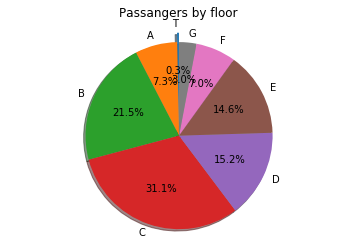

In [354]:
# Write your answer here
import pandas as pd
import numpy as np

titanic = pd.read_excel(DATA_FOLDER + "/titanic.xls") 
ch_key = ["T","A","B","C","D","E","F","G"] # this is the signs for etages
ch_count = [0]*len(ch_key) # it is total number of different persons on each floor
ch_flag = [0]*len(ch_key) # this help me to count one person that has three cabines on the same floor, like cabin[1] = "C22 C26"
# as one person and not three persons
series_ch = pd.Series(ch_count, index = ch_key)
series_flag = pd.Series(ch_flag, index = ch_key)
titanic_cab = titanic[["cabin"]] 
titanic_cab = titanic_cab.dropna() # dropping cabins with NaN values

pieces = [] # that is for string cabin[1]= "C22 C26" separating in first letters like CC
# also there exist people like cabin[605] = "F G63" so we should check all first letter

for one_cab in titanic_cab.cabin:
    pieces = [x[0] for x in one_cab.split()] # taking first letters
    for index, element in enumerate(pieces): 
        if (one_cab.count(element)>=1 & series_flag[element]==0): # updating just once series_flag for each and every floors and & element in ch_key
            series_flag[element]=1
    pieces=[]
    for index in ch_key:
        series_ch[index]+=series_flag[index] # updating total number of people before taking data of next people
        series_flag[index]=0 

import matplotlib.pyplot as plt
labels=["T","A","B","C","D","E","F","G"]
sizes = series_ch.values
explode = (0.1, 0, 0 , 0, 0, 0, 0, 0)  # just first label little larger
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("Passangers by floor")
plt.show()

In [ ]:
Here we calculate and plot survival percentage for each class

survived         0         1
pclass                      
1         0.380805  0.619195
2         0.570397  0.429603
3         0.744711  0.255289


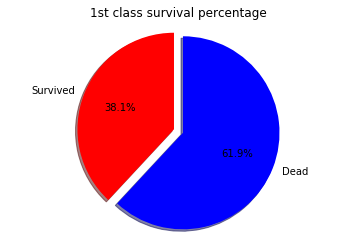

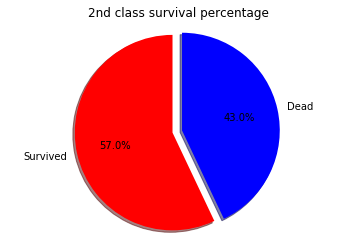

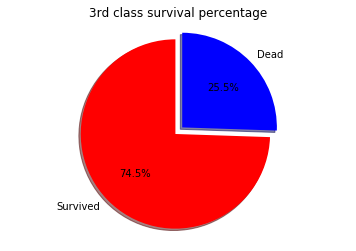

In [355]:
cross_class_sur = pd.crosstab(titanic.pclass, titanic.survived, margins=False, normalize='index')
# print(cross_class_sur)

import matplotlib.pyplot as plt

# Pie chart survival by class
labels = 'Survived', 'Dead'
for i in range(cross_class_sur.shape[0]): # for each class take the two numbers that represent ratio of survived people
    sizes = cross_class_sur.iloc[i] # this is taking numbers
    explode = (0, 0.1)
    colors = ("red","blue")
    fig1, ax1 = plt.subplots()
    ax1.pie(sizes, colors=colors, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
    ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.title(str(i+1)+(i==0)*'st'+(i==1)*'nd'+(i==2)*"rd"+ " class survival percentage") # writing title for each class is different
    plt.show()

Here we are calculating plotting survival percentage looking at sex and class at the same time as pie chart.

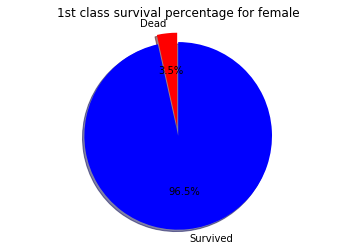

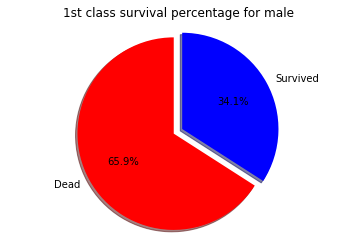

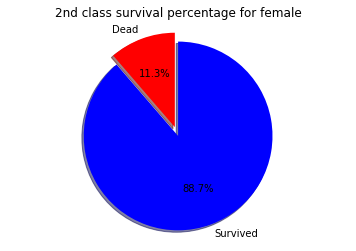

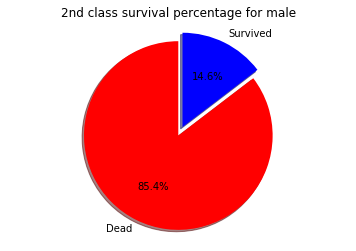

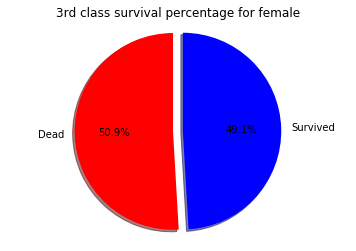

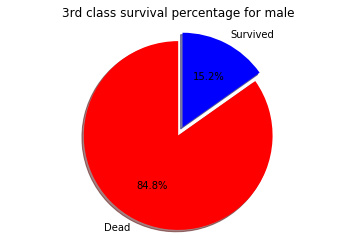

In [356]:
import matplotlib.pyplot as plt # just to ensure that it will be drawn, i know that i already imported it
%matplotlib inline
               
cross_class_sex = pd.crosstab([titanic.pclass, titanic.sex], titanic.survived, margins=False, normalize='index')
# Pie chart survival per class and sex
labels ='Dead' , 'Survived'
for i in range(cross_class_sex.shape[0]): # for each class and sex taking numbers that represent survived
    sizes = cross_class_sex.iloc[i] # taking these numbers
    explode = (0.1, 0) 
    colors = ("red","blue")
    fig1, ax1 = plt.subplots()
    ax1.pie(sizes,colors=colors, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
    ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.title(str((i+1)*(i==0)+((i+2)/2)*(i!=0))+((i==0)+(i==1))*'st'+((i==2)+(i==3))*'nd'+((i==4) + (i==5))*"rd"+ " class survival percentage for "+((i==0)+(i==2)+(i==4))*"fe"+"male")
    plt.show()

Here we are presenting same data as histogram

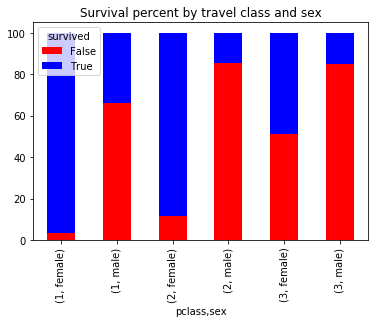

In [357]:
# Histogram, survival percent by travel and class
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure()
cross_class_sex_s = pd.crosstab([titanic.pclass, titanic.sex], titanic.survived.astype(bool), margins=False, normalize="index")*100
cross_class_sex_s.plot(kind='bar', stacked=True, color=['red','blue'], grid=False)
plt.title('Survival percent by travel class and sex')
plt.show()

We are printing types of all different kind of data, min i max of their values. We are keeping some data for 
calculating survival percentage looking at the same time at class, sex and age.

In [358]:
# writing type and range of data
print(titanic.dtypes)
print(titanic.max(axis=0)) 
print(titanic.min(axis=0))
# we can store age as category, because now it is stored as float, and for this analysis is not so important number of ages

# keeping data for making two age categories, without NaN values because we will use get_dummies
titanic_age_notna = titanic["age"].dropna() # for making dataframe and crosstable for part six, with two age categories
index_of_age = list(titanic_age_notna.index.values)
titanic_part_six = pd.DataFrame(list(zip(titanic_age_notna, titanic.pclass.iloc[index_of_age], titanic.sex.iloc[index_of_age], titanic.survived.iloc[index_of_age])))
titanic_part_six.columns = ['age', 'pclass', 'sex','survived']
# print(titanic_age_notna)

pclass         int64
survived       int64
name          object
sex           object
age          float64
sibsp          int64
parch          int64
ticket        object
fare         float64
cabin         object
embarked      object
boat          object
body         float64
home.dest     object
dtype: object
pclass                                 3
survived                               1
name         van Melkebeke, Mr. Philemon
sex                                 male
age                                   80
sibsp                                  8
parch                                  9
ticket                         WE/P 5735
fare                             512.329
cabin                                  T
embarked                               S
boat                                   D
body                                 328
home.dest            Zurich, Switzerland
dtype: object
pclass                         1
survived                       0
name         Abbing, Mr. Anthony
sex  

Plotting histogram of number of passangers with respect to 1) age 2) travel_class 3) embarkation point 4) sex

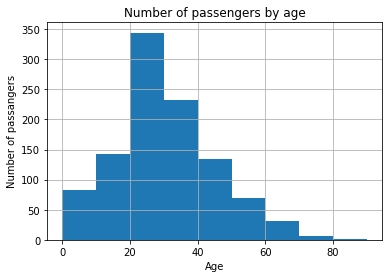

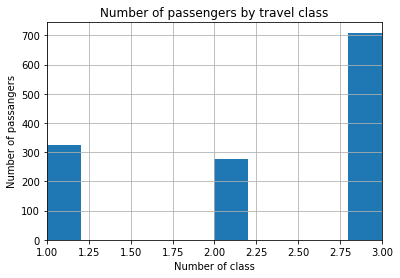

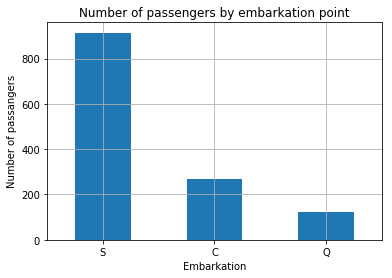

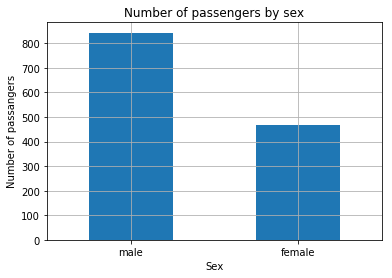

In [359]:
# Plotting histogram of number of passangers with respect to 1) age 2) travel_class 3) embarkation point 4) sex
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure();
titanic.hist(column="age", bins=[0,10,20,30,40,50,60,70,80,90])
plt.title('Number of passengers by age')
plt.xlabel('Age')
plt.ylabel('Number of passangers')
plt.show()


# ploting histogram, rot=0 for horizontal text
plt.figure();
titanic.hist(column="pclass")
plt.xlim([1, 3])
# Set the title and labels
plt.title('Number of passengers by travel class')
plt.xlabel('Number of class')
plt.ylabel('Number of passangers')
plt.show()


# ploting histogram, rot=0 for horizontal text
plt.figure();
titanic.embarked.value_counts().reindex(titanic.embarked[:len(titanic.embarked.value_counts())])
titanic.embarked.value_counts().plot(kind='bar', grid=True, rot=0)
# Set the title and labels
plt.title('Number of passengers by embarkation point')
plt.xlabel('Embarkation')
plt.ylabel('Number of passangers')
plt.show()


# ploting histogram, rot=0 for horizontal text
plt.figure();
titanic.sex.value_counts().reindex(titanic.sex[:len(titanic.sex.value_counts())])
titanic.sex.value_counts().plot(kind='bar', grid=True, rot=0)
# Set the title and labels
plt.title('Number of passengers by sex')
plt.xlabel('Sex')
plt.ylabel('Number of passangers')
plt.show()

# finally putting ages in categories, it is important for later analysis that we have made a copy of ages as numeric type
# for drawing histogram is also important that type of ages is numeric type
titanic=titanic.fillna({"age":0})
titanic["age"]= pd.cut(titanic["age"],[0,10,20,30,40,50,60,70,80,90])


Here we are making two equal populated age categories with no NaN values, and the category will be written as 1 for young, and 2 for old 

In [360]:
# We have this notation in order to calculate easier survival percent using crosstable
# If we do not want this we should use the groupby and function apply 
quantiles = pd.qcut(titanic_part_six.age, 2)
df_dummies = pd.get_dummies(quantiles)
# find
index_first_cat = (np.where(df_dummies.iloc[:,0]==1))
#print(len(index_first_cat))
index_sec_cat = (np.where(df_dummies.iloc[:,1]==1))
#print(len(index_sec_cat))
titanic_part_six.age.iloc[index_first_cat] = 1
titanic_part_six.age.iloc[index_sec_cat] = 2

Plotting histograms that represent survival percent for each class, each sex and each age category

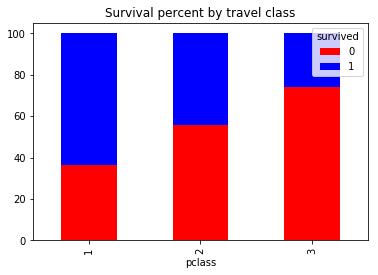

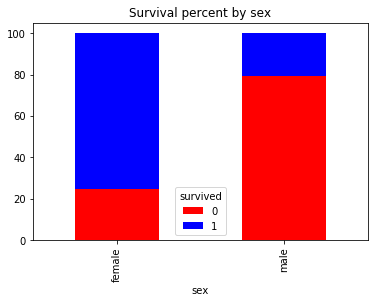

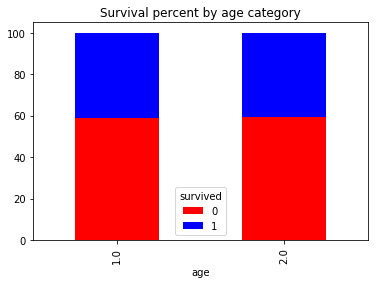

In [361]:
# Plotting histograms that represent survival percent for each class, each sex and each age category

import matplotlib.pyplot as plt
%matplotlib inline
plt.figure();
cross_pclass_s = pd.crosstab(titanic_part_six.pclass, titanic_part_six.survived, margins=False, normalize='index')*100
cross_pclass_s.plot(kind='bar', stacked=True, color=['red','blue'], grid=False)
plt.title('Survival percent by travel class')
plt.show()

plt.figure()
cross_sex_s = pd.crosstab(titanic_part_six.sex, titanic_part_six.survived, margins=False, normalize='index')*100
cross_sex_s.plot(kind='bar', stacked=True, color=['red','blue'], grid=False)
plt.title('Survival percent by sex')
plt.show()

plt.figure()
cross_age_s = pd.crosstab(titanic_part_six.age, titanic_part_six.survived, margins=False, normalize='index')*100
cross_age_s.plot(kind='bar', stacked=True, color=['red','blue'], grid=False)
plt.title('Survival percent by age category')
plt.show()


Plotting histogram where we represent survival for each class, sex and age category

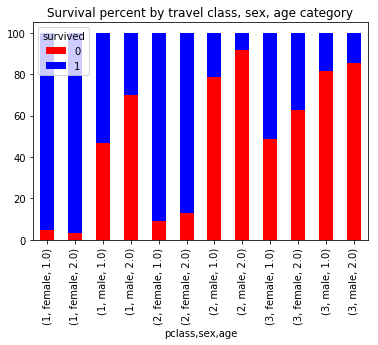

In [362]:
# Plotting histogram where we represent survival for each class, sex and age category

import matplotlib.pyplot as plt
%matplotlib inline

plt.figure();
cross_classexindex_s = pd.crosstab([titanic_part_six.pclass, titanic_part_six.sex, titanic_part_six.age], titanic_part_six.survived, margins=False, normalize='index')*100
# print(cross_classexindex_s)
cross_classexindex_s.plot(kind='bar', stacked=True, color=['red','blue'], grid=False)
plt.title('Survival percent by travel class, sex, age category')
plt.show()


Storing age as two equal populated categories

In [363]:
# Storing age as two equal populated categories
titanic_part_six["age"] = pd.qcut(titanic_age_notna,2) # because the numbers must be different, we are calling on titanic_aga_notna
# titanic_part_six.head()
# titanic_part_six.index.unique()

,age,pclass,sex,survived
0,"(28.0, 80.0]",1,female,1
1,"(0.166, 28.0]",1,male,1
2,"(0.166, 28.0]",1,female,0
3,"(28.0, 80.0]",1,male,0
4,"(0.166, 28.0]",1,female,0
